<a href="https://colab.research.google.com/github/chape8/Signal-Processing-III/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

ruta = '/content/drive/MyDrive/Colab_Notebooks/Miniproyecto1/'
#ruta = '/content/drive/MyDrive/Señales3/ArchivosLab5/'
fileName = 'DataMP1.csv'
dataFrame = pd.read_csv(ruta+fileName)

labels = dataFrame.iloc[:,-1]
X = dataFrame.iloc[:,:43]

X

,GSR_ASR,GSR_ART,GSR_SP1,GSR_SP2,GSR_SP3,GSR_SP4,GSR_SP5,GST_SP6,GST_SP7,GST_SP8,...,EEG_SPA2,EEG_SPA3,EEG_SPA4,EEG_SPA5,EEG_SPB1,EEG_SPB2,EEG_SPB3,EEG_SPB4,EEG_SPB5,emociones
0,10185.8373,2.8610,5824.086256,3160.889602,1531.962502,1407.169064,1112.161887,946.870950,928.750378,756.121295,...,1.865161,5.184980,3.461216,5.041652,2.347163,1.275503,1.003328,0.899888,3.630238,-1
1,21389.0536,5.4277,5901.050602,5630.767559,3266.364561,2322.511795,2195.642188,1637.077819,1488.656242,1483.136799,...,4.361935,7.807040,7.042410,11.376475,2.705221,1.546289,1.463202,1.123135,4.089784,1
2,3638.4043,3.2995,6631.572569,4495.135267,4154.063415,3820.369967,2106.092449,1860.914648,1788.312912,1565.316907,...,3.694577,6.448128,3.988058,13.472448,3.966875,7.282834,1.469042,1.323243,28.286193,1
3,5976.4411,1.7400,3651.065367,2169.304973,1506.748412,977.858909,731.283848,525.795948,505.031318,481.742671,...,5.335904,4.490130,3.020488,15.374982,4.037560,3.302149,1.213788,0.994780,11.462958,1
4,-3103.7651,2.8309,7820.942207,2373.298569,1500.350662,1314.859602,1184.245000,1132.603089,1061.837264,785.553400,...,6.142650,5.798278,5.087005,25.914103,5.881958,11.364667,2.188542,2.427907,49.342339,0
5,-1554.2202,2.0712,5098.209113,3616.809486,3574.573996,3571.895109,2086.905875,1507.515297,1417.932482,1234.394187,...,4.123910,3.896095,3.614934,12.999729,3.476684,2.377859,1.493458,1.226882,7.242188,0
6,12228.7500,3.4401,5850.529766,3440.963239,2803.855218,1926.028872,1248.302459,1047.737737,982.579685,970.384118,...,3.389828,5.144338,4.325678,9.845600,4.995091,2.106852,1.383918,1.079252,5.782894,1
7,1262.8277,2.4089,4480.883860,2206.169540,1752.638742,1327.046007,1079.291554,867.161223,558.254187,492.347030,...,2.895643,4.206870,2.693486,11.025678,3.928179,1.561336,1.005914,0.768845,4.644839,-1
8,3409.2335,2.3834,3492.834431,2144.129060,1096.500488,936.078126,709.164006,579.806225,518.769025,445.785444,...,2.357371,5.321294,3.388625,5.438403,1.701443,0.935837,1.488231,0.889604,1.781128,0
9,-6240.9078,3.3529,8832.824545,4777.153307,4094.881401,2088.918366,2011.623456,1634.592848,1634.156187,1338.195001,...,4.012138,5.584374,4.661680,13.543346,3.529477,2.317885,1.253263,0.937862,8.117149,0


In [17]:
scaler = StandardScaler()
scaler.fit(X)
print('Var',scaler.var_)
print('mean',scaler.mean_)
Xscaled = scaler.transform(X)

Var [9.09914921e+07 1.16350175e+00 8.80107329e+06 2.40891846e+06
 1.20430982e+06 7.48508987e+05 4.59988747e+05 2.24229509e+05
 2.13188961e+05 1.76411617e+05 1.39691487e+05 1.20926223e+05
 1.97457110e+07 9.76106267e+05 4.81867736e+12 9.00496329e+10
 1.37402642e+10 8.23330587e+03 2.13400000e+01 1.33854158e+00
 4.08832424e-03 6.40169662e-06 1.09141177e-15 3.13110560e-18
 1.88275000e+01 5.13612165e+00 1.19791530e+07 9.54141419e+00
 2.30124256e+02 1.31000164e+00 1.20303327e+00 3.98813547e+03
 1.88937906e-01 1.82400695e+00 9.44133887e-01 1.30306249e+00
 3.25992350e+01 3.59913876e+00 3.51817233e+00 4.43392111e-02
 7.77329918e-02 7.19682738e+01 4.94375000e-01]
mean [ 3.94347953e+03  3.06002000e+00  6.14889010e+03  3.43651618e+03
  2.33328085e+03  1.76207895e+03  1.41825810e+03  1.14090518e+03
  1.01227249e+03  8.95283623e+02  8.03581299e+02  7.12966505e+02
  8.62228916e+02  4.33641383e+03  2.77099650e+06  3.58977844e+05
  1.02279206e+05  5.81418446e+00  1.64000000e+01  3.74361566e+00
 -1.81259

Para que el modelo predictivo tenga un mejor desempeño hay que normalizar los datos, esto es, hacer que para cada caracteristica la varianza sea 1 y la media sea 0. Con el proposito de tener magnitudes mas pequeñas y escaladas con respecto a todas las caracteristicas.

Input Space: (40, 43)
Latent Space: (40, 40)
[1.06931628e+01 7.21452859e+00 3.65899002e+00 3.25414498e+00
 2.78079706e+00 2.25890289e+00 2.06802866e+00 1.72744794e+00
 1.50392465e+00 1.40974450e+00 1.22213722e+00 9.52415248e-01
 8.78897628e-01 6.71086582e-01 5.90599421e-01 4.99379488e-01
 4.35326706e-01 3.60772442e-01 3.09331487e-01 2.69296381e-01
 2.44527427e-01 2.05861656e-01 1.88834815e-01 1.60617684e-01
 1.19188819e-01 8.58308945e-02 8.41624951e-02 5.89115243e-02
 5.32435948e-02 3.48475996e-02 2.79717313e-02 2.77044203e-02
 1.76664639e-02 1.24128985e-02 1.09142741e-02 4.66375917e-03
 3.17590127e-03 2.13267246e-03 9.80798887e-04 5.11549992e-32]
(40, 43)


Text(0, 0.5, 'Cumulative explained variance')

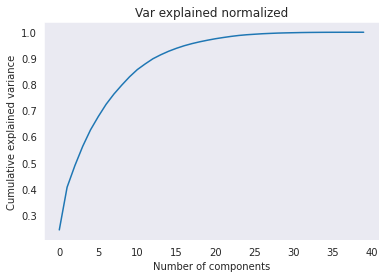

In [18]:
pca = PCA(n_components = 40)  # project from 42 to 40 dimensions

projectedZ = pca.fit_transform(Xscaled)
BasisW = pca.components_
print('Input Space:',Xscaled.shape)
print('Latent Space:',projectedZ.shape)
print(pca.explained_variance_)
print(BasisW.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.title('Var explained normalized')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Se uso la varianza acumulativa para poder observar al rededor de cuantas componentes eran necesarias para alcansar el 90% de la varianza del dataset. Como se puede observar en la grafica anterior al rededor de 13 componentes se logra dicho objetivo, por lo que podriamos reducir el dataset de 42 componentes a tan solo 13 y obtener buenos resultados. Para efectos de analisis vamos a trabajar con valores de q = [7,10,13,15,16,19,20,22,25], esto con el fin de analiza como se comporta el parametro de accuaracy dependiendo del número de componentes que se tomen con respecto a los modelos de regresión logistica y Bayesiano.

In [19]:
def pca_function(Xscaled, q):
  pca = PCA(n_components = q)  # project from 42 to 40 dimensions

  projectedZ = pca.fit_transform(Xscaled)
  #projected = pca.inverse_transform(components)
  sns.set_style('darkgrid')
  #fig, ax = plt.subplots()
  projectedZDF = pd.DataFrame(data = projectedZ)
  projectedZDF['emociones'] = labels
  unique = labels.unique()
  palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
  ax = sns.pairplot(data=projectedZDF, hue='emociones', palette=palette, corner = True)

  plt.tight_layout()
  plt.figure()

  return projectedZ


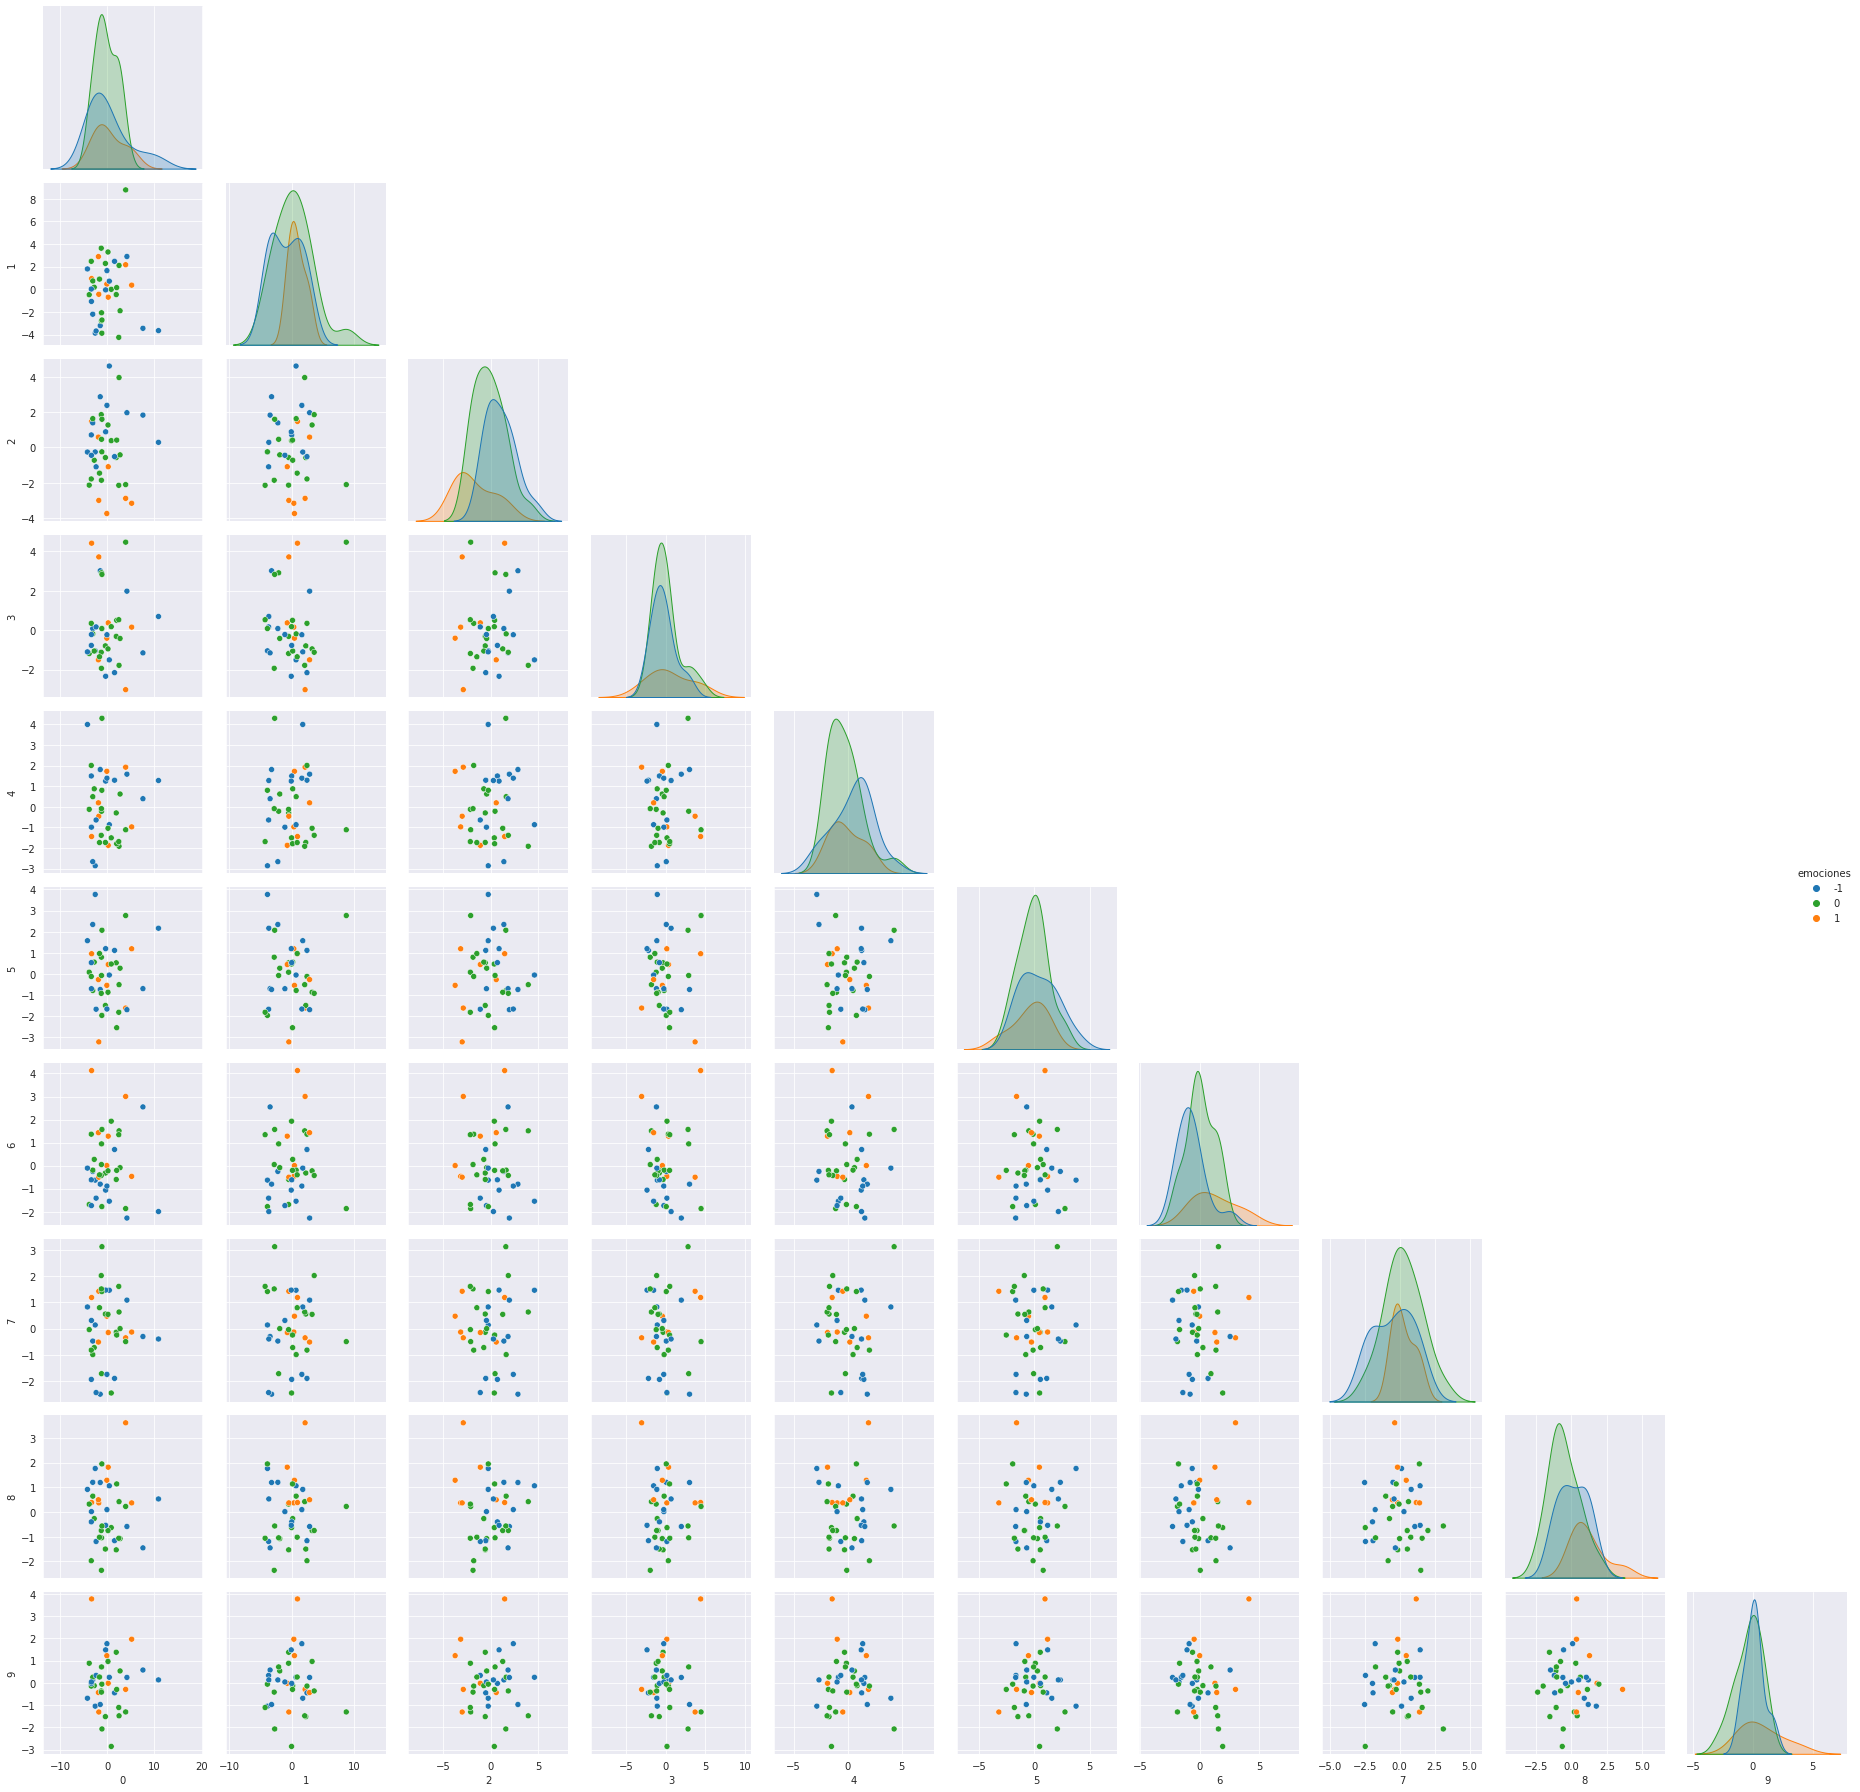

<Figure size 432x288 with 0 Axes>

In [20]:
projected_10 = pca_function(Xscaled, 10)

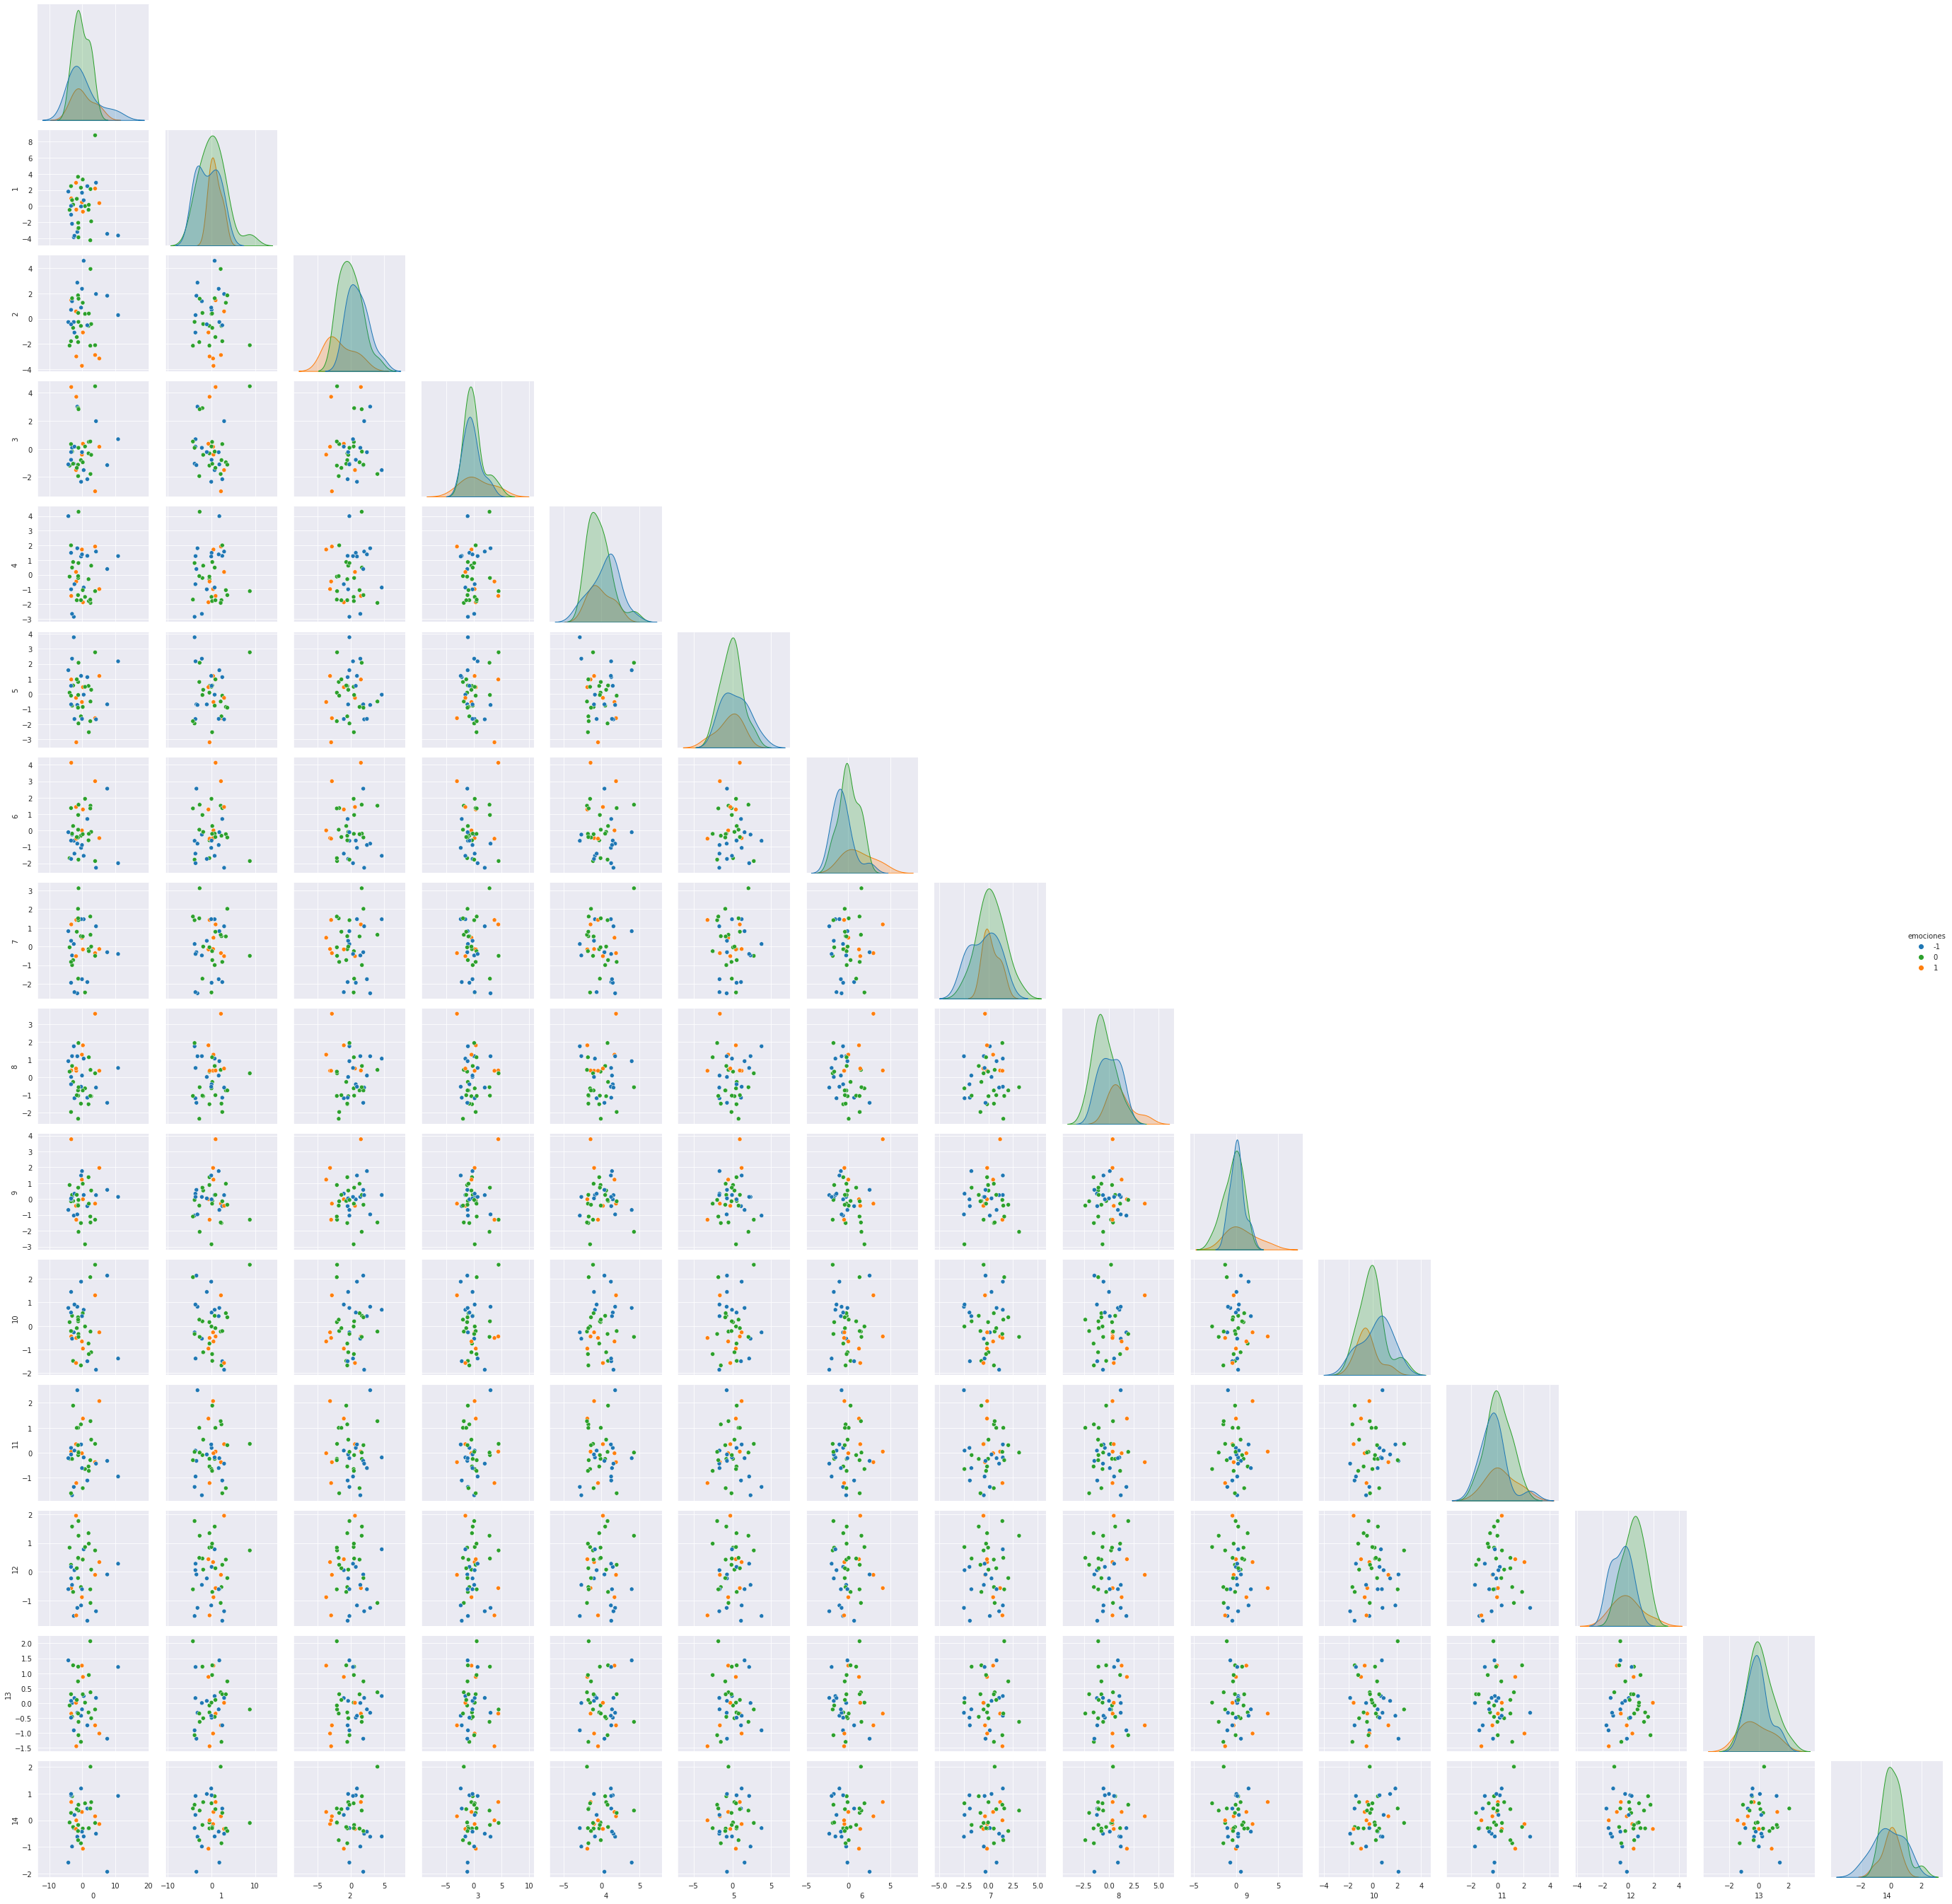

<Figure size 432x288 with 0 Axes>

In [21]:
projected_15 = pca_function(Xscaled, 15)

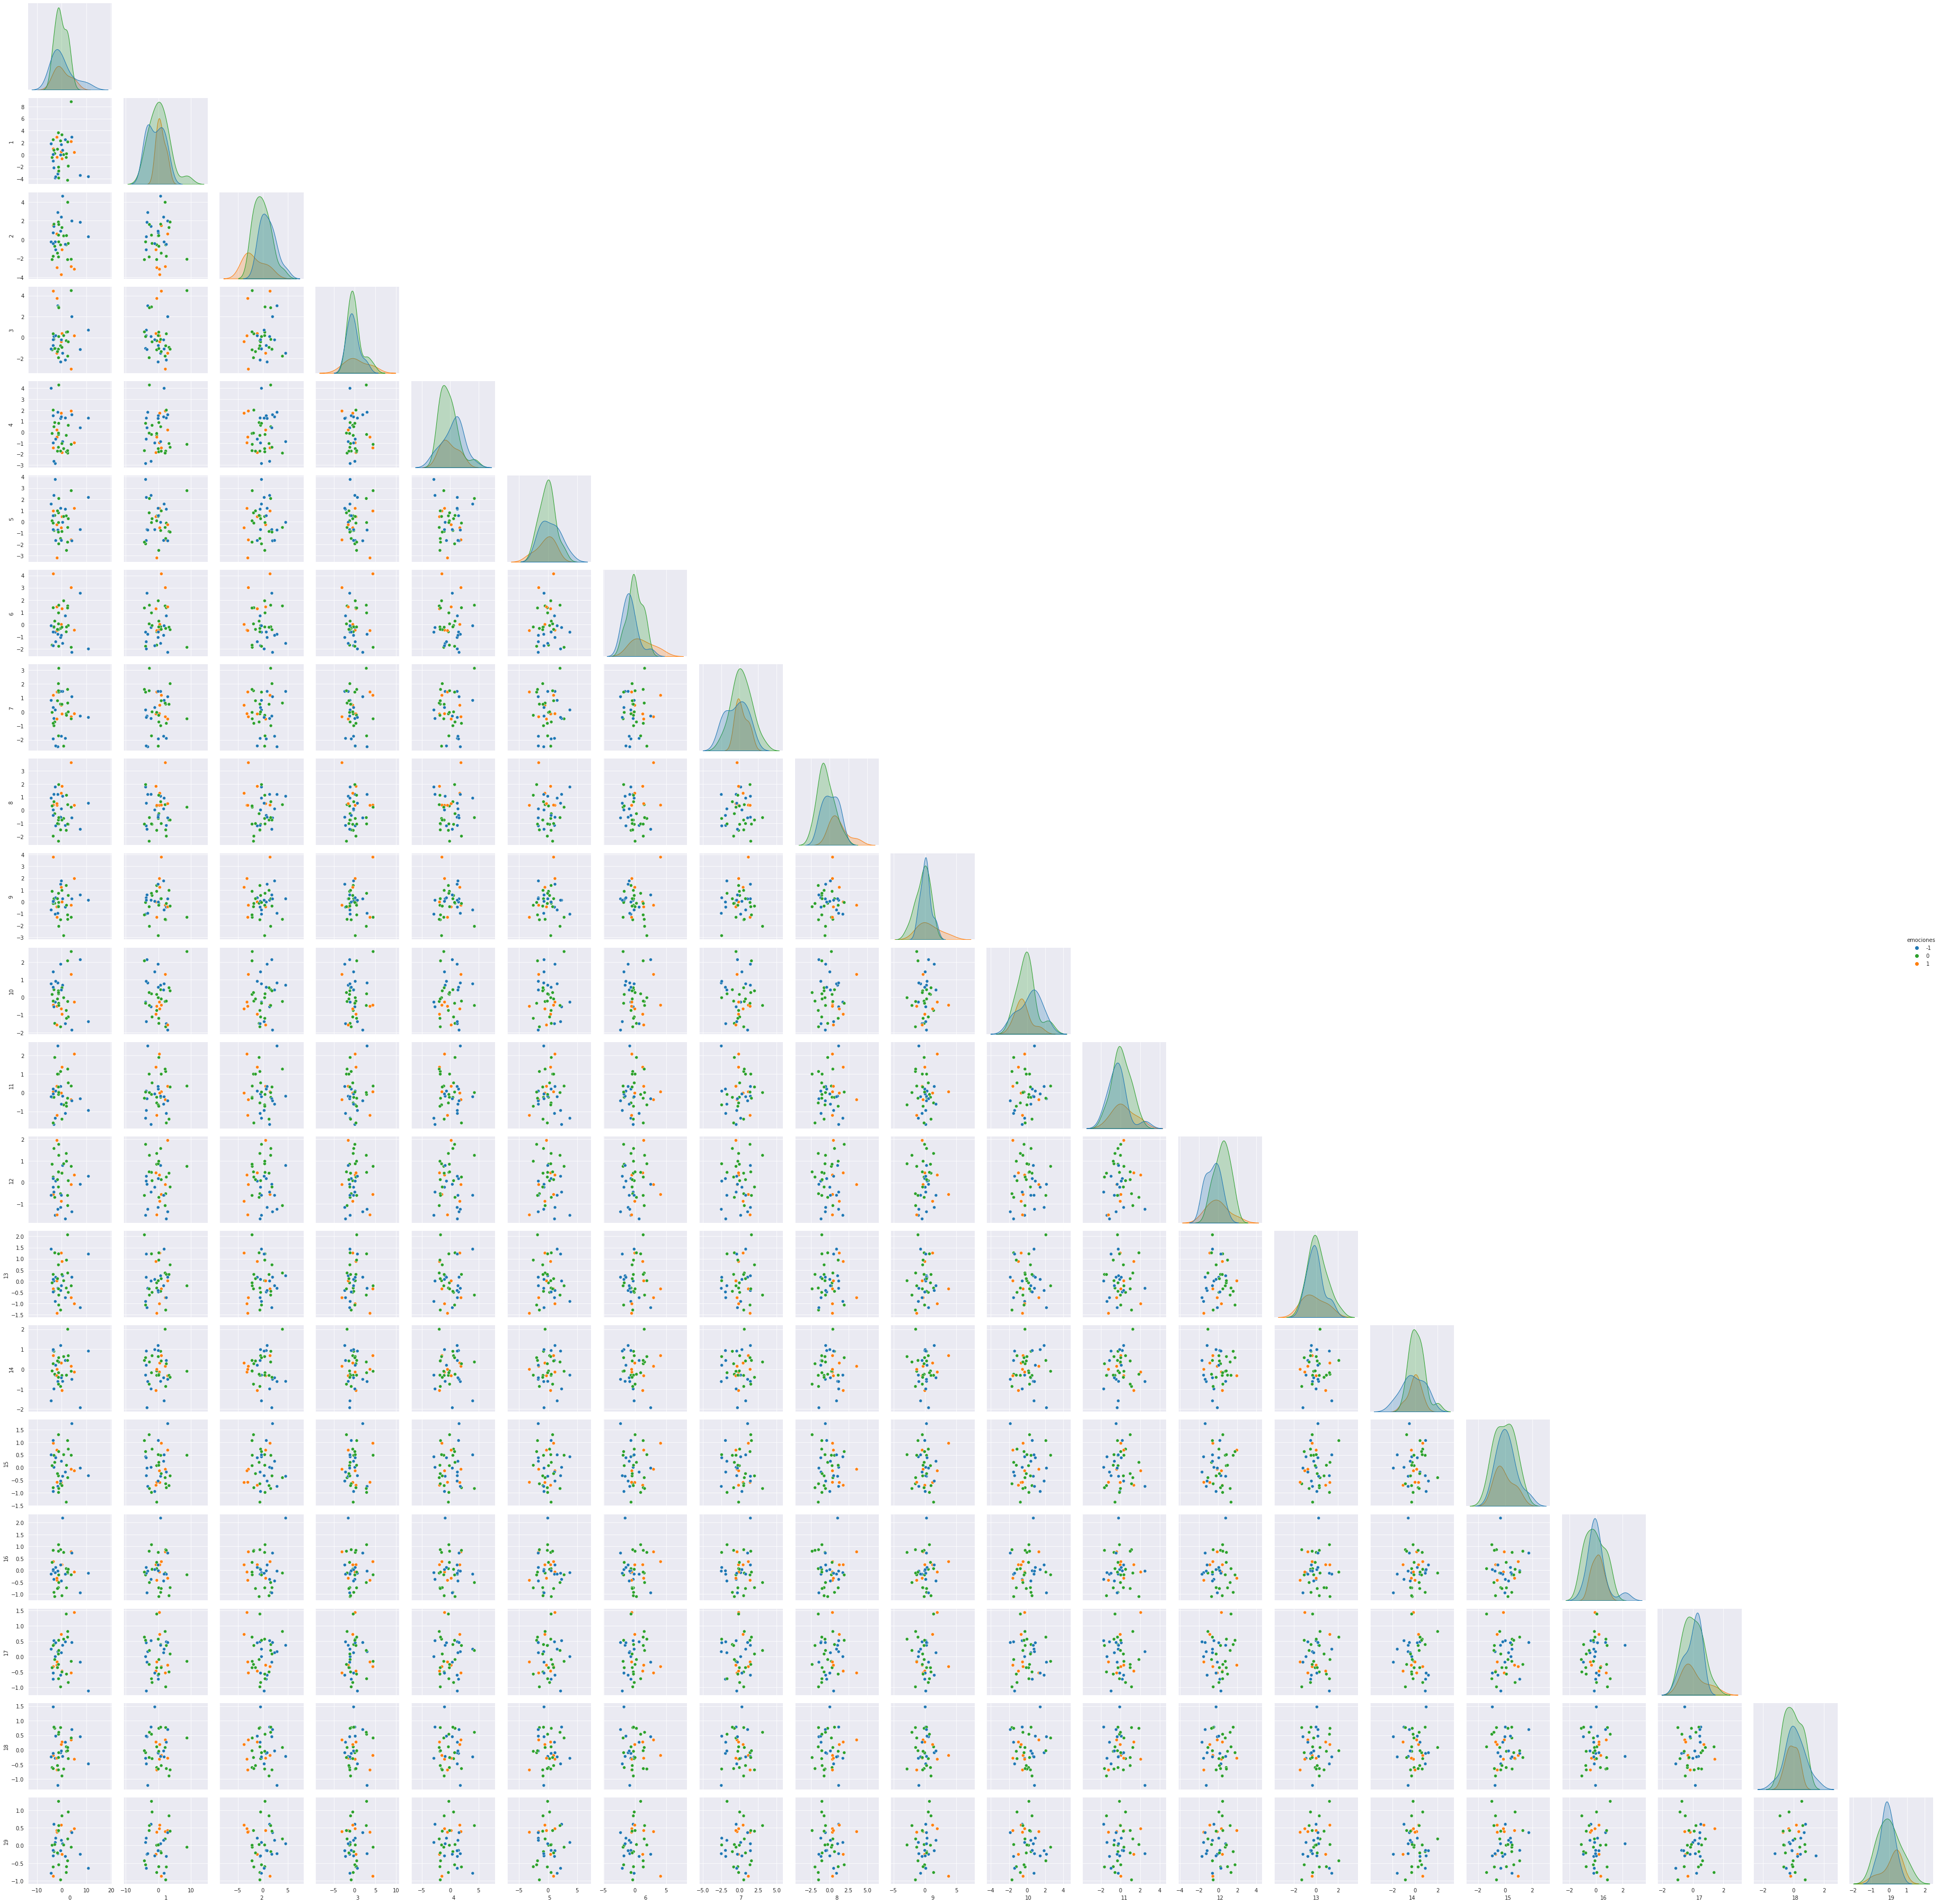

<Figure size 432x288 with 0 Axes>

In [22]:
projected_20 = pca_function(Xscaled, 20)

Se puede observar en las figuras para valores de q = 10,15 y 20, que las caracteristicas siguen agrupadas y no existe una separación que depende de las emociones. Esto debido a que cuando se trabaja con señales biologicas es muy dificil que se presente un agrupamiento de datos marcado para una etiqueta. 

In [23]:
def Logistic_Regression(Xscaled):
  acc_train = []
  acc_test = []
  Nreps = 100
  for it in range(Nreps):

    Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled,labels,test_size=0.3)

    modelRL = LogisticRegression(C = 0.05)
    modelRL.fit(Xtrain,ytrain)

    y_est_train = modelRL.predict(Xtrain)
    y_est_test = modelRL.predict(Xtest)
    acc_train.append(accuracy_score(ytrain,y_est_train))
    acc_test.append(accuracy_score(ytest,y_est_test))


  print('Acc Train: ',np.mean(acc_train),'±',np.std(acc_train))
  print('Acc Test: ',np.mean(acc_test),'±',np.std(acc_test))

In [24]:
def pca_function_no_graph(Xscaled, q):
  pca = PCA(n_components = q)  # project from 42 to 40 dimensions

  projectedZ = pca.fit_transform(Xscaled)

  return projectedZ

In [25]:
projected_7 = pca_function_no_graph(Xscaled, 7)
projected_10 = pca_function_no_graph(Xscaled, 10)
projected_13 = pca_function_no_graph(Xscaled, 13)
projected_15 = pca_function_no_graph(Xscaled, 15)
projected_16 = pca_function_no_graph(Xscaled, 16)
projected_19 = pca_function_no_graph(Xscaled, 19)
projected_20 = pca_function_no_graph(Xscaled, 20)
projected_22 = pca_function_no_graph(Xscaled, 22)
projected_25 = pca_function_no_graph(Xscaled, 25)

In [26]:
print('Accuaracy score for Xscaled \n')
Logistic_Regression(Xscaled)
print('\nAccuaracy score for projected_7 \n')
Logistic_Regression(projected_7)
print('\nAccuaracy score for projected_10 \n')
Logistic_Regression(projected_10)
print('\nAccuaracy score for projected_13 \n')
Logistic_Regression(projected_13)
print('\nAccuaracy score for projected_15 \n')
Logistic_Regression(projected_15)
print('\nAccuaracy score for projected_16 \n')
Logistic_Regression(projected_16)
print('\nAccuaracy score for projected_19 \n')
Logistic_Regression(projected_19)
print('\nAccuaracy score for projected_20 \n')
Logistic_Regression(projected_20)
print('\nAccuaracy score for projected_22 \n')
Logistic_Regression(projected_22)
print('\nAccuaracy score for projected_25 \n')
Logistic_Regression(projected_25)

Accuaracy score for Xscaled 

Acc Train:  0.9378571428571427 ± 0.03297339682166797
Acc Test:  0.595 ± 0.13541089731299735

Accuaracy score for projected_7 

Acc Train:  0.7207142857142856 ± 0.053780544240231605
Acc Test:  0.4591666666666667 ± 0.11872879927708264

Accuaracy score for projected_10 

Acc Train:  0.8260714285714285 ± 0.05501739057158312
Acc Test:  0.48166666666666663 ± 0.11760338241545416

Accuaracy score for projected_13 

Acc Train:  0.9057142857142857 ± 0.036950049018221624
Acc Test:  0.5666666666666667 ± 0.13844373104863456

Accuaracy score for projected_15 

Acc Train:  0.9142857142857145 ± 0.039769745448785886
Acc Test:  0.5583333333333333 ± 0.12774758097296576

Accuaracy score for projected_16 

Acc Train:  0.9157142857142857 ± 0.03929220725564306
Acc Test:  0.5833333333333334 ± 0.1541103500742244

Accuaracy score for projected_19 

Acc Train:  0.9189285714285714 ± 0.03907573755293844
Acc Test:  0.5675 ± 0.14799352463311813

Accuaracy score for projected_20 

Acc Tr

Si comparamos el accuaracy score para los diferentes valores de q, podemos decir que por ejemplo con solo 7 componentes no se alcanza a obtener ni siquiera el 80% de la varianza por lo tanto su precisión no sera la mejor, de hecho en este analisis fue la que peor valor presento, se puede concluir que no se obtiene un buen desempeño solo con 7 componentes.

Ahora, desde el valor para q = 13 donde se obtiene aproximadamente el 90% de varianza según lo que se analizo anteriormente, en adelante se obtiene mejores resultados y un valor de precisión mejor de alrededor del 55% con una varianza de alrededor de 14%, se puede observar que para todo el dataset con las 42 componentes se obtuvo un resultado en el test de 0.53 ± 0.14 , esto muestra que con menos componentes podemos obtener un desempeño similar incluso mejor con menos componentes. 

Esto ayuda al costo computacional


In [27]:
from sklearn.naive_bayes import GaussianNB
def Bayesian_Regression(Xscaled):
  acc_train = []
  acc_test = []
  Nreps = 100
  for it in range(Nreps):

    Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled,labels,test_size=0.3)

    modelB = GaussianNB()
    modelB.fit(Xtrain,ytrain)

    y_est_train = modelB.predict(Xtrain)
    y_est_test = modelB.predict(Xtest)
    acc_train.append(accuracy_score(ytrain,y_est_train))
    acc_test.append(accuracy_score(ytest,y_est_test))


  print('Acc Train: ',np.mean(acc_train),'±',np.std(acc_train))
  print('Acc Test: ',np.mean(acc_test),'±',np.std(acc_test))

In [28]:
print('Accuaracy score for Xscaled \n')
Bayesian_Regression(Xscaled)
print('\nAccuaracy score for projected_7 \n')
Bayesian_Regression(projected_7)
print('\nAccuaracy score for projected_10 \n')
Bayesian_Regression(projected_10)
print('\nAccuaracy score for projected_13 \n')
Bayesian_Regression(projected_13)
print('\nAccuaracy score for projected_15 \n')
Bayesian_Regression(projected_15)
print('\nAccuaracy score for projected_16 \n')
Bayesian_Regression(projected_16)
print('\nAccuaracy score for projected_19 \n')
Bayesian_Regression(projected_19)
print('\nAccuaracy score for projected_20 \n')
Bayesian_Regression(projected_20)
print('\nAccuaracy score for projected_22 \n')
Bayesian_Regression(projected_22)
print('\nAccuaracy score for projected_25 \n')
Bayesian_Regression(projected_25)

Accuaracy score for Xscaled 

Acc Train:  1.0 ± 0.0
Acc Test:  1.0 ± 0.0

Accuaracy score for projected_7 

Acc Train:  0.8250000000000002 ± 0.059440417775332995
Acc Test:  0.46666666666666673 ± 0.12304019216861167

Accuaracy score for projected_10 

Acc Train:  0.8557142857142856 ± 0.05222596117265977
Acc Test:  0.4666666666666666 ± 0.13642254619787417

Accuaracy score for projected_13 

Acc Train:  0.9442857142857142 ± 0.036533462435841185
Acc Test:  0.5191666666666667 ± 0.1398684898197033

Accuaracy score for projected_15 

Acc Train:  0.9496428571428571 ± 0.035027321697585184
Acc Test:  0.5283333333333333 ± 0.13905434589077434

Accuaracy score for projected_16 

Acc Train:  0.9532142857142856 ± 0.03182180936119767
Acc Test:  0.4975 ± 0.12826567480558987

Accuaracy score for projected_19 

Acc Train:  0.9678571428571426 ± 0.02923340275668731
Acc Test:  0.4733333333333334 ± 0.1171893055416463

Accuaracy score for projected_20 

Acc Train:  0.9714285714285714 ± 0.027664166758624393
Ac

Para el modelo Bayesiano se nota mas el impacto de los datos transformados al espacio latente, se puede observar que con las 42 caracteristicas obtuvimos un valor de precisión de 0.3175 +/- 0.12 para los datos de test, sin embargo cuando aplicamos el modelo a los datos transformados al espacio latente podemos observar que con 13 componentes el desempeño del modelo mejora notablemente obteniendo un valor de precisión de 0.49 +/- 0.12.

##Conclusiones

-Al aplicar PCA a las caracteristicas con el fin de reducir la dimensionalidad y llevarlas al espacio latente con el numero de caracteristicas que representaban el 90% de la varianza, no se pudo lograr una mejor visualizacion de ellas dado que igualmente se veian agrupadas entre si.Dado en el contexto de lo que representan las caracteristicas es algo que se puede sustentar que iba a suceder de que no se separaran debido a que señales de tipo biologicas tienen este comportamiento,y se necesitan de metodos mas robustos para lograr el agrupamiento por etiqueta,en este caso emociones.

-Al reducir la dimensionalidad de los dataset,primero se ayuda a un mejor analisis de los datos pues se pueden contar con caracteristicas mas representativas y "desechar" las que no aportan tanta informacion al análisis.Además, se logra reducir la complejidad computacional pues las operaciones internas que hacen los equipos de analisis serán de menor tamaño.
